In [3]:
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-detection\\images_subset")

In [50]:
install.packages("fastDummies")

Warning message:
"package 'fastDummies' is in use and will not be installed"

package 'kerasR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alif-\AppData\Local\Temp\Rtmp2Fj1Zd\downloaded_packages


In [1]:
library(keras)
library(EBImage)
library(tidyverse)
library(keras)
library(fastDummies)
library(caret)
library(tensorflow)

Warning message:
"package 'keras' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::combine()   masks EBImage::combine()
x dplyr::filter()    masks stats::filter()
x dplyr::lag()       masks stats::lag()
x purrr::transpose() masks EBImage::transpose()
Warning message:
"package 'fastDummies' was built under R version 3.6.3"Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift




In [2]:
file_list <- list.files(path="C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-detection\\images_subset")
file_list

[1] "ISIC_0000000.jpg"             "ISIC_0000001.jpg"            
  [3] "ISIC_0000002.jpg"             "ISIC_0000003.jpg"            
  [5] "ISIC_0000004.jpg"             "ISIC_0000006.jpg"            
  [7] "ISIC_0000007.jpg"             "ISIC_0000008.jpg"            
  [9] "ISIC_0000009.jpg"             "ISIC_0000010.jpg"            
 [11] "ISIC_0000011.jpg"             "ISIC_0000012.jpg"            
 [13] "ISIC_0000013.jpg"             "ISIC_0000014.jpg"            
 [15] "ISIC_0000015.jpg"             "ISIC_0000016.jpg"            
 [17] "ISIC_0000017_downsampled.jpg" "ISIC_0000018_downsampled.jpg"
 [19] "ISIC_0000019_downsampled.jpg" "ISIC_0000020_downsampled.jpg"
 [21] "ISIC_0000021_downsampled.jpg" "ISIC_0000022_downsampled.jpg"
 [23] "ISIC_0000023_downsampled.jpg" "ISIC_0000024_downsampled.jpg"
 [25] "ISIC_0000025_downsampled.jpg" "ISIC_0000026_downsampled.jpg"
 [27] "ISIC_0000027_downsampled.jpg" "ISIC_0000028_downsampled.jpg"
 [29] "ISIC_0000029_downsampled.jpg" "ISIC_0000030_downsampled.jpg"
 [31] "ISIC_0000031_downsampled.jpg" "ISIC_0000032_downsampled.jpg"
 [33] "ISIC_0000034_downsampled.jpg" "ISIC_0000035_downsampled.jpg"
 [35] "ISIC_0000036_downsampled.jpg" "ISIC_0000037_downsampled.jpg"
 [37] "ISIC_0000038_downsampled.jpg" "ISIC_0000039_downsampled.jpg"
 [39] "ISIC_0000040_downsampled.jpg" "ISIC_0000041_downsampled.jpg"
 [41] "ISIC_0000042_downsampled.jpg" "ISIC_0000043_downsampled.jpg"
 [43] "ISIC_0000044_downsampled.jpg" "ISIC_0000045_downsampled.jpg"
 [45] "ISIC_0000046_downsampled.jpg" "ISIC_0000047_downsampled.jpg"
 [47] "ISIC_0000048_downsampled.jpg" "ISIC_0000049_downsampled.jpg"
 [49] "ISIC_0000050_downsampled.jpg" "ISIC_0000051_downsampled.jpg"
 [51] "ISIC_0000052_downsampled.jpg" "ISIC_0000053_downsampled.jpg"
 [53] "ISIC_0000054_downsampled.jpg" "ISIC_0000055_downsampled.jpg"
 [55] "ISIC_0000056_downsampled.jpg" "ISIC_0000057_downsampled.jpg"
 [57] "ISIC_0000058_downsampled.jpg" "ISIC_0000059_downsampled.jpg"
 [59] "ISIC_0000060_downsampled.jpg" "ISIC_0000061_downsampled.jpg"
 [61] "ISIC_0000062_downsampled.jpg" "ISIC_0000063_downsampled.jpg"
 [63] "ISIC_0000064_downsampled.jpg" "ISIC_0000065_downsampled.jpg"
 [65] "ISIC_0000066.jpg"             "ISIC_0000067.jpg"            
 [67] "ISIC_0000068.jpg"             "ISIC_0000069.jpg"            
 [69] "ISIC_0000071.jpg"             "ISIC_0000072.jpg"            
 [71] "ISIC_0000073.jpg"             "ISIC_0000074.jpg"            
 [73] "ISIC_0000075.jpg"             "ISIC_0000077_downsampled.jpg"
 [75] "ISIC_0000078_downsampled.jpg" "ISIC_0000079_downsampled.jpg"
 [77] "ISIC_0000080_downsampled.jpg" "ISIC_0000081_downsampled.jpg"
 [79] "ISIC_0000082_downsampled.jpg" "ISIC_0000085_downsampled.jpg"
 [81] "ISIC_0000086_downsampled.jpg" "ISIC_0000087_downsampled.jpg"
 [83] "ISIC_0000088_downsampled.jpg" "ISIC_0000089_downsampled.jpg"
 [85] "ISIC_0000091_downsampled.jpg" "ISIC_0000092_downsampled.jpg"
 [87] "ISIC_0000093_downsampled.jpg" "ISIC_0000094_downsampled.jpg"
 [89] "ISIC_0000095_downsampled.jpg" "ISIC_0000096_downsampled.jpg"
 [91] "ISIC_0000097_downsampled.jpg" "ISIC_0000098_downsampled.jpg"
 [93] "ISIC_0000099_downsampled.jpg" "ISIC_0000100_downsampled.jpg"
 [95] "ISIC_0000101_downsampled.jpg" "ISIC_0000102_downsampled.jpg"
 [97] "ISIC_0000103_downsampled.jpg" "ISIC_0000104_downsampled.jpg"
 [99] "ISIC_0000105_downsampled.jpg" "ISIC_0000107_downsampled.jpg"
[101] "ISIC_0000108_downsampled.jpg" "ISIC_0000109_downsampled.jpg"
[103] "ISIC_0000110_downsampled.jpg" "ISIC_0000111_downsampled.jpg"
[105] "ISIC_0000112_downsampled.jpg" "ISIC_0000113_downsampled.jpg"
[107] "ISIC_0000114_downsampled.jpg" "ISIC_0000115_downsampled.jpg"
[109] "ISIC_0000116_downsampled.jpg" "ISIC_0000117_downsampled.jpg"
[111] "ISIC_0000118_downsampled.jpg" "ISIC_0000119_downsampled.jpg"
[113] "ISIC_0000120_downsampled.jpg" "ISIC_0000121_downsampled.jpg"
[115] "ISIC_0000122_downsampled.jpg" "ISIC_0000123_downsampled.jpg"
[117] "ISIC_0000124_downsampled.jpg" "ISIC_0000125_downsam

In [4]:
file_one <- file_list[1]

In [ ]:
one_img <- readImage(file_list[1])
display(one_img)

In [6]:
melanoma_pic <- list()
for (i in 1:length(file_list)) {melanoma_pic[[i]] <- readImage(file_list[i])}
for (i in 1:length(file_list)) {melanoma_pic[[i]] <- resize(melanoma_pic[[i]], 28, 28)}
for (i in 1:length(file_list)) {melanoma_pic[[i]] <- array_reshape(melanoma_pic[[i]], c(28, 28, 3))}

In [26]:
train_x <- NULL
for (i in 1:length(file_list)) {train_x <- rbind(train_x, melanoma_pic[[i]])}

In [13]:
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-detection")
raw_labels <- read.csv('labels_subset.csv')
dummy = dummy_cols(raw_labels,remove_first_dummy = TRUE)

In [61]:
train_y = dummy[1:153,2]
test_y = dummy[203:230,2]

In [62]:
train_labels <- to_categorical(train_y)
test_labels <- to_categorical(test_y)

In [30]:
test_file_list <- list.files(path="C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-detection\\test_images_subset")
test_file_list

[1] "ISIC_0000216.jpg"             "ISIC_0000217.jpg"            
 [3] "ISIC_0000218_downsampled.jpg" "ISIC_0000219.jpg"            
 [5] "ISIC_0000220.jpg"             "ISIC_0000221.jpg"            
 [7] "ISIC_0000222.jpg"             "ISIC_0000223.jpg"            
 [9] "ISIC_0000224.jpg"             "ISIC_0000225.jpg"            
[11] "ISIC_0000226.jpg"             "ISIC_0000227.jpg"            
[13] "ISIC_0000228.jpg"             "ISIC_0000229.jpg"            
[15] "ISIC_0000230.jpg"             "ISIC_0000231.jpg"            
[17] "ISIC_0000232.jpg"             "ISIC_0000233.jpg"            
[19] "ISIC_0000234.jpg"             "ISIC_0000235.jpg"            
[21] "ISIC_0000236.jpg"             "ISIC_0000237.jpg"            
[23] "ISIC_0000239.jpg"             "ISIC_0000240.jpg"            
[25] "ISIC_0000242.jpg"             "ISIC_0000243.jpg"            
[27] "ISIC_0000244.jpg"             "ISIC_0000245.jpg"

In [32]:
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-detection\\test_images_subset")

In [35]:
test_melanoma_pic <- list()
for (i in 1:length(test_file_list)) {test_melanoma_pic[[i]] <- readImage(test_file_list[i])}
for (i in 1:length(test_file_list)) {test_melanoma_pic[[i]] <- resize(test_melanoma_pic[[i]], 28, 28)}
for (i in 1:length(test_file_list)) {test_melanoma_pic[[i]] <- array_reshape(test_melanoma_pic[[i]], c(28, 28, 3))}

In [63]:
test_x <- NULL
for (i in 1:length(test_file_list)) {test_x <- rbind(test_x, test_melanoma_pic[[i]])}

In [64]:
model <- keras_model_sequential()
model %>%
  layer_dense(units=256, activation = "relu", input_shape = c(2352)) %>%
  layer_dense(units=128, activation = "relu") %>%
  layer_dense(units=2, activation = "softmax")
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 256)                     602368      
________________________________________________________________________________
dense_1 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dense_2 (Dense)                     (None, 2)                       258         
Total params: 635,522
Trainable params: 635,522
Non-trainable params: 0
________________________________________________________________________________


In [65]:
model %>%
  compile(loss = "binary_crossentropy",
          optimize = optimizer_rmsprop(),
          metrics = c("accuracy"))

In [66]:
history <- model %>%
  fit(train_x, train_labels, epochs = 30, batch_size = 32,
      validation_split = 0.2)

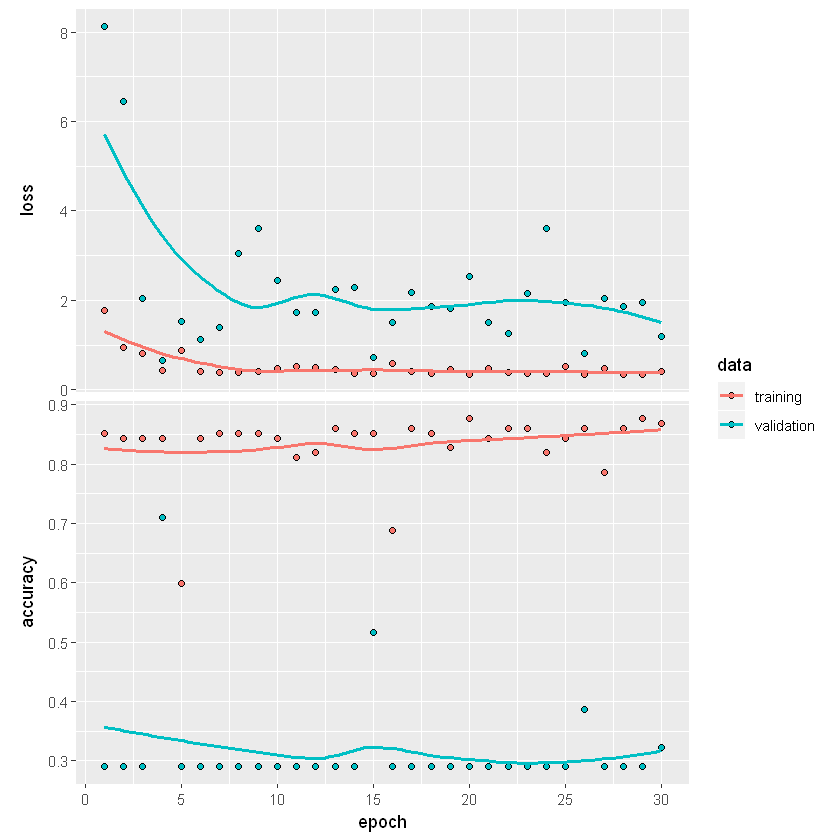

In [67]:
plot(history)